<a href="https://colab.research.google.com/github/priyankkumar218/MISC/blob/master/ML17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning and Grid Search

##K-Means Clustering

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [164]:
from sklearn.datasets import make_blobs

In [216]:
x, y = make_blobs(n_samples=300, centers=5, cluster_std=0.6)

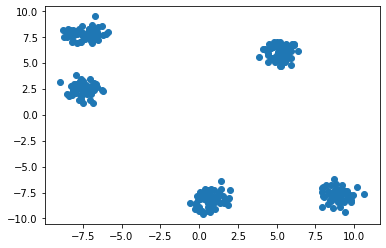

In [217]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [218]:
from sklearn.cluster import KMeans

In [219]:
WCV = []
for i in range(1, 16):
  km=KMeans(n_clusters=i)
  km.fit(x)
  WCV.append(km.inertia_)

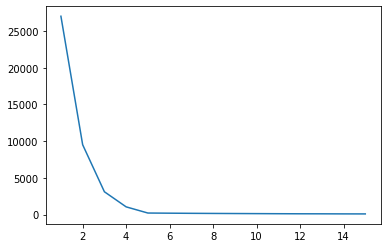

In [220]:
plt.plot(range(1, 16), WCV)
plt.show()

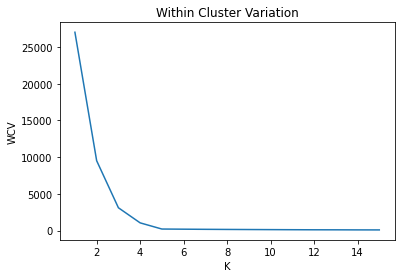

In [221]:
plt.plot(range(1, 16), WCV)
plt.xlabel('K')
plt.ylabel('WCV')
plt.title('Within Cluster Variation')
plt.show()

In [222]:
km = KMeans(n_clusters = 5)

In [223]:
y_pred = km.fit_predict(x)

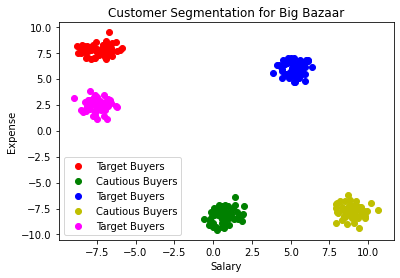

In [225]:
plt.scatter(x[y_pred==0, 0],x[y_pred==0,1], c="r", label="Target Buyers")
plt.scatter(x[y_pred==1, 0],x[y_pred==1,1], c="g", label="Cautious Buyers")
plt.scatter(x[y_pred==2, 0],x[y_pred==2,1], c="b", label="Target Buyers") 
plt.scatter(x[y_pred==3, 0],x[y_pred==3,1], c="y", label="Cautious Buyers")
plt.scatter(x[y_pred==4, 0],x[y_pred==4,1], c="magenta", label="Target Buyers") 
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Expense')
plt.title('Customer Segmentation for Big Bazaar')
plt.show()

##Grid Search

In [226]:
from sklearn.datasets import load_digits

In [227]:
dataset = load_digits()

In [228]:
X = dataset.data
y = dataset.target

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
dtf = DecisionTreeClassifier()

In [231]:
param = [{'criterion':['gini', 'entropy']},
         {'max_depth':[1, 2, 3, 4, 5, 6, 7]}]

In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
grid = GridSearchCV(dtf, param)

In [234]:
grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy']},
              

In [235]:
grid.score(X, y)

1.0

In [236]:
grid.cv_results_

{'mean_fit_time': array([0.02203813, 0.02752328, 0.00301018, 0.00501213, 0.00722594,
        0.00948973, 0.01172528, 0.01355786, 0.01521173]),
 'mean_score_time': array([0.00079761, 0.00062718, 0.00038247, 0.00039697, 0.00047174,
        0.00050259, 0.00053406, 0.00054836, 0.00054817]),
 'mean_test_score': array([0.78914423, 0.81304395, 0.19754875, 0.31218818, 0.43297431,
        0.54930981, 0.63223924, 0.7179217 , 0.75184463]),
 'param_criterion': masked_array(data=['gini', 'entropy', --, --, --, --, --, --, --],
              mask=[False, False,  True,  True,  True,  True,  True,  True,
                     True],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[--, --, 1, 2, 3, 4, 5, 6, 7],
              mask=[ True,  True, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'},
  {'criterion': 'entropy'},
  {'max_depth': 1},
  {'max_depth': 

In [237]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [238]:
best = grid.best_estimator_

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
knn = KNeighborsClassifier()

In [241]:
param = {'n_neighbors':[2, 3, 6, 4]}

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
grid = GridSearchCV(knn, param)

In [244]:
grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 6, 4]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [245]:
grid.score(X, y)

0.9910962715637173

In [246]:
grid.cv_results_

{'mean_fit_time': array([0.00801597, 0.00686431, 0.00684295, 0.00733104]),
 'mean_score_time': array([0.07256637, 0.07313752, 0.07170281, 0.0715004 ]),
 'mean_test_score': array([0.96717115, 0.96606469, 0.95938564, 0.96384092]),
 'param_n_neighbors': masked_array(data=[2, 3, 6, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 6},
  {'n_neighbors': 4}],
 'rank_test_score': array([1, 2, 4, 3], dtype=int32),
 'split0_test_score': array([0.96111111, 0.95555556, 0.94444444, 0.94722222]),
 'split1_test_score': array([0.96666667, 0.95833333, 0.95833333, 0.95833333]),
 'split2_test_score': array([0.96935933, 0.96657382, 0.96657382, 0.96657382]),
 'split3_test_score': array([0.97771588, 0.98328691, 0.97493036, 0.98050139]),
 'split4_test_score': array([0.96100279, 0.96657382, 0.95264624, 0.96657382]),
 'std_fit_time': array([2.35445416e-03, 8.61687097e-05, 6.19338966e-

In [247]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [248]:
best = grid.best_estimator_